<a href="https://colab.research.google.com/github/HugoSilvaRodrigues/BookMachineLearning/blob/main/folder/Livro_cap_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv


--2023-01-26 23:38:06--  https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2023-01-26 23:38:06 (98.2 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [ ]:
import pandas as pd
housing=pd.read_csv("housing.csv")
housing.head()
print(housing.shape)

(20640, 10)


In [ ]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4218d0c6a0>,
      dtype=object)

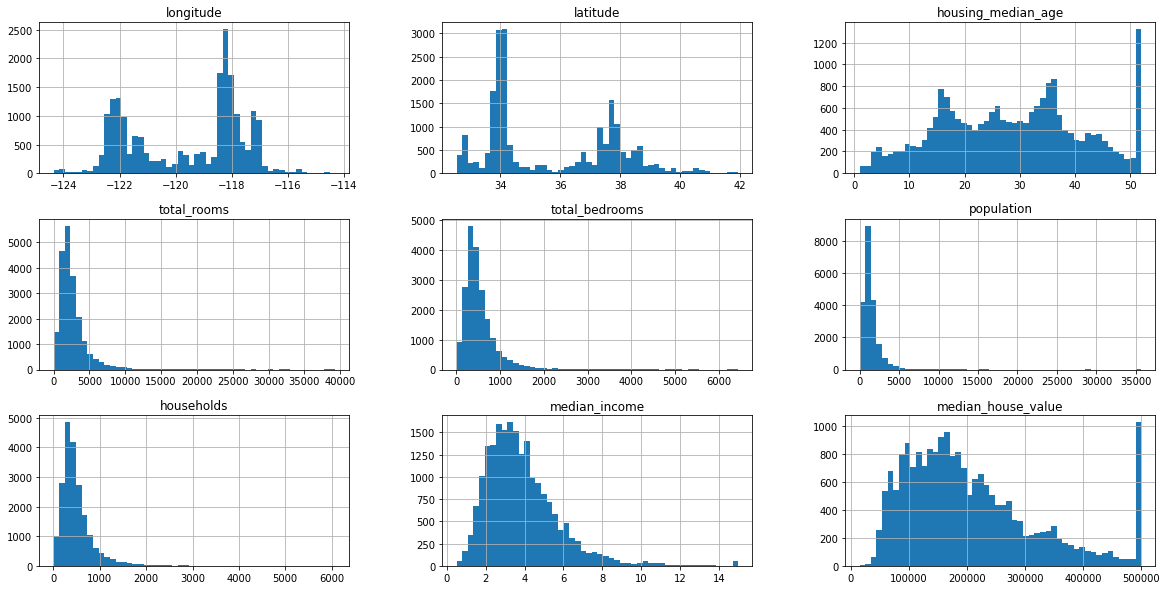

In [ ]:
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=[20,10])

In [ ]:
X=housing.drop("median_house_value",axis=1)
y=housing.median_house_value

from sklearn.model_selection import train_test_split
X_test,X_train=train_test_split(X,test_size=0.2,random_state=42)

In [ ]:
import numpy as np
housing['income_cat']=pd.cut(housing["median_income"],
                             bins=[0,1.5,3.0,4.5,6,np.inf],
                             labels=[1,2,3,4,5])

print(housing["income_cat"])


0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

for frame in (strat_test_set,strat_train_set):
  frame.drop("income_cat",axis=1)

In [ ]:
corr_matrix=housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f421893be80>,
      dtype=object)

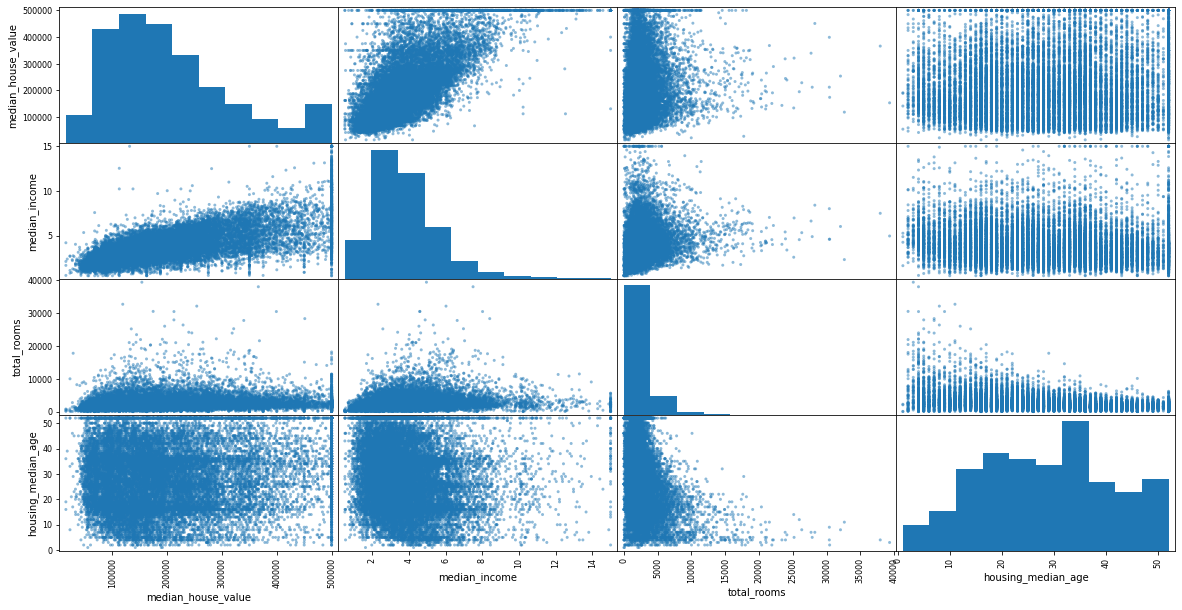

In [ ]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]# numeric attributes

scatter_matrix(housing[attributes],figsize=(20,10))

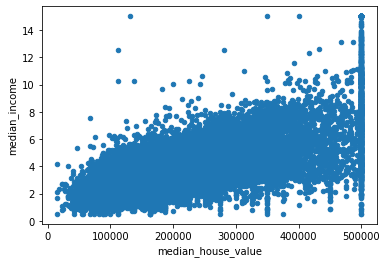

In [ ]:
housing.plot(x="median_house_value",y="median_income",kind="scatter")

In [ ]:
#creating new attributes

housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
corr_matrix=housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
population            -0.024650
longitude             -0.045967
latitude              -0.144160
Name: median_house_value, dtype: float64


In [ ]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set.median_house_value.copy()

In [ ]:
#taking care of missing values
print(housing.isna().sum())

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
housing_num=housing.drop("ocean_proximity",axis=1)#creating a df with just numeric variables
imputer.fit(housing_num)#fit the imputer in the numeric df
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
print(housing_tr)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72

In [ ]:
housing_cat=housing[["ocean_proximity"]]

from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()
housing_cat_encoder=encoder.fit_transform(housing_cat)
print(encoder.categories_)
print(housing_cat_encoder.toarray())

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
num_pipeline=Pipeline([("imputer",SimpleImputer(strategy="median")),
                      ("scaler", StandardScaler())])

cat_pipeline=Pipeline([("encoder", OneHotEncoder())])
print(housing.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income ocean_proximity income_cat  
12655      2237.0       706.0         2.1736          INLAND          2  
15502      2015.0       768.0         6.3373      NEAR OCEAN          5  
2908        667.0       300.0         2.8750          INLAND          2  
14053       898.0       483.0         2.2264      NEAR OCEAN          2  
20496      1837.0       580.0         4.4964       <1H OCEAN          3  


In [ ]:
from sklearn.compose import ColumnTransformer

pipeline=ColumnTransformer([("num_pipeline", num_pipeline,list(housing_num.columns)),
                           ("cat_pipeline", cat_pipeline,["ocean_proximity"])])


housing_prepared=pipeline.fit_transform(housing)
print(housing_prepared)

[[-0.94135046  1.34743822  0.02756357 ...  0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 ...  0.          0.
   0.        ]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.          0.
   0.        ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.          0.
   0.        ]
 [-1.28105026  2.02567448 -0.13148926 ...  0.          0.
   0.        ]]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
reg=RandomForestRegressor()

reg.fit(housing_prepared,housing_labels)
some_data=housing_prepared[:15]
some_labels=housing_labels[:15]

predict=reg.predict(some_data)

print(mean_squared_error(some_labels,predict))

1979481617.80318


In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid=[{"n_estimators":[3,10,30], "max_features":[2,4,6,8]}]

grid_search=GridSearchCV(reg,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
estimator=grid_search.best_estimator_
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"]
X_test=pipeline.transform(strat_test_set)
print(np.sqrt(mean_squared_error(y_test,estimator.predict(X_test))))

48810.224628166165
